# Test cluster and Dimensionality Reduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Save dtw csv to df

In [2]:
index = {0:'adamsmith', 1:'embulk', 2:'google', 3:'guillaume', 4:'iven', 5:'microsoft', 6:'oleiade', 7:'pandas', 8:'yang', 9:'zhn'}

In [3]:
cm_dtw = pd.read_csv('./commits_clean_10/commits_dtw.csv').rename(index=index)
is_dtw = pd.read_csv('./issues_clean_10/issues_dtw.csv').rename(index=index)
pr_dtw = pd.read_csv('./pr_clean_10/pr_dtw.csv').rename(index=index)
stars_dtw = pd.read_csv('./stars_clean_10/stars_dtw.csv').rename(index=index)

In [4]:
df = pd.concat([cm_dtw, is_dtw, pr_dtw, stars_dtw], axis=1).replace(np.nan, 0)
df

C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,adamsmith_mth,embulk_mth,google_mth,guillaume_mth,iven_mth,microsoft_mth,oleiade_mth,pandas_mth,yang_mth,zhn_mth,...,adamsmith_star,embulk_star,google_star,guillaume_star,iven_star,microsoft_star,oleiade_star,pandas_star,yang_star,zhn_star
adamsmith,0.000000,6.896988,6.361666,0.000000,2.503970,2.209631,3.658880,10.222556,3.797498,1.885109,...,0.000000,0.499393,1.224497,0.308630,1.306346,0.995110,1.109341,1.076215,1.096712,0.467932
embulk,6.896988,0.000000,0.668144,6.896988,0.494328,0.700625,0.495343,0.546690,1.033986,1.185475,...,0.499393,0.000000,0.939710,0.335108,1.030166,0.835905,0.931150,0.748143,0.851699,0.225486
google,6.361666,0.668144,0.000000,6.361666,0.655334,0.973834,0.550339,0.740744,1.286794,1.280312,...,1.224497,0.939710,0.000000,1.037892,0.657521,0.747535,0.713659,0.748807,0.654949,1.119836
guillaume,0.000000,6.896988,6.361666,0.000000,2.503970,2.209631,3.658880,10.222556,3.797498,1.885109,...,0.308630,0.335108,1.037892,0.000000,1.115906,0.905295,0.997194,0.922322,0.959202,0.369980
iven,2.503970,0.494328,0.655334,2.503970,0.000000,0.602422,0.379931,0.787129,1.026719,1.172385,...,1.306346,1.030166,0.657521,1.115906,0.000000,0.398503,0.545225,0.700290,0.419541,1.180207
microsoft,2.209631,0.700625,0.973834,2.209631,0.602422,0.000000,0.578733,0.954588,0.884513,0.885385,...,0.995110,0.835905,0.747535,0.905295,0.398503,0.000000,0.388870,0.959875,0.425012,0.949369
oleiade,3.658880,0.495343,0.550339,3.658880,0.379931,0.578733,0.000000,0.623247,1.089423,1.159664,...,1.109341,0.931150,0.713659,0.997194,0.545225,0.388870,0.000000,1.150649,0.572147,1.050151
pandas,10.222556,0.546690,0.740744,10.222556,0.787129,0.954588,0.623247,0.000000,1.070044,1.079823,...,1.076215,0.748143,0.748807,0.922322,0.700290,0.959875,1.150649,0.000000,0.855419,0.989844
yang,3.797498,1.033986,1.286794,3.797498,1.026719,0.884513,1.089423,1.070044,0.000000,0.293465,...,1.096712,0.851699,0.654949,0.959202,0.419541,0.425012,0.572147,0.855419,0.000000,1.028610
zhn,1.885109,1.185475,1.280312,1.885109,1.172385,0.885385,1.159664,1.079823,0.293465,0.000000,...,0.467932,0.225486,1.119836,0.369980,1.180207,0.949369,1.050151,0.989844,1.028610,0.000000


# PCA & Hierarchial Clustering

C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


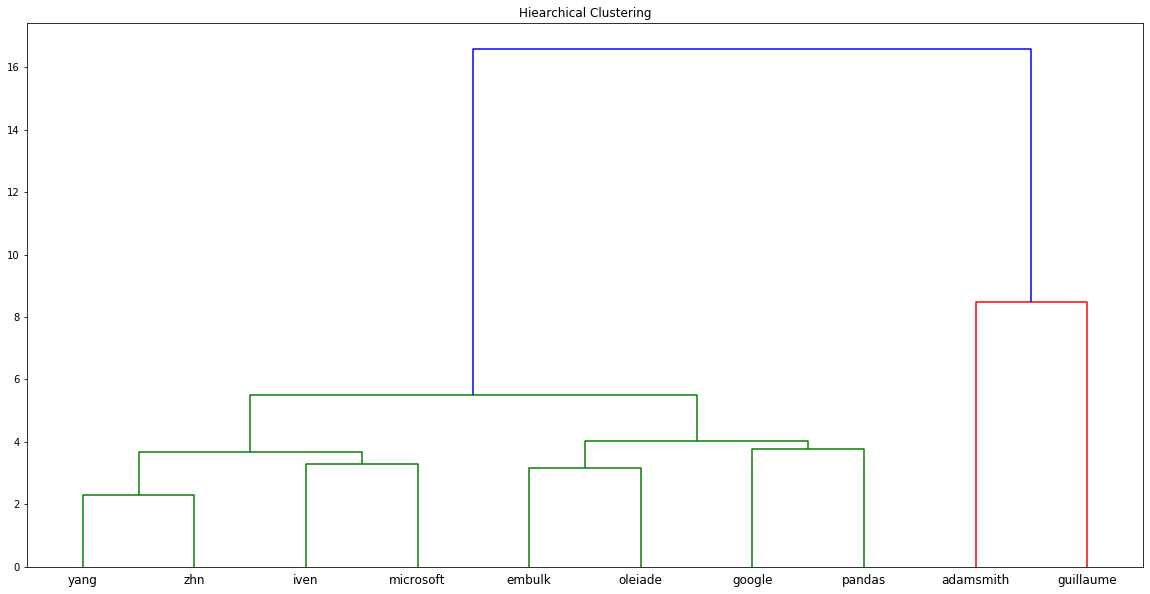

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_array = pca.fit_transform(df.as_matrix())

linked = linkage(pca_array, 'single')
labelList = df.index

plt.figure(figsize=(20, 10))
plt.title('Hiearchical Clustering')
dend = dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
#plt.show()

### F-cluster return the labels for the each repo

In [6]:
# Print repo and their cluster number: Tweak the number to get different clustering option
for i in zip(df.index, fcluster(linked, 0.7)):
    print(i)

('adamsmith', 5)
('embulk', 3)
('google', 4)
('guillaume', 5)
('iven', 2)
('microsoft', 2)
('oleiade', 3)
('pandas', 4)
('yang', 1)
('zhn', 1)


# Hierarchial Clustering

C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


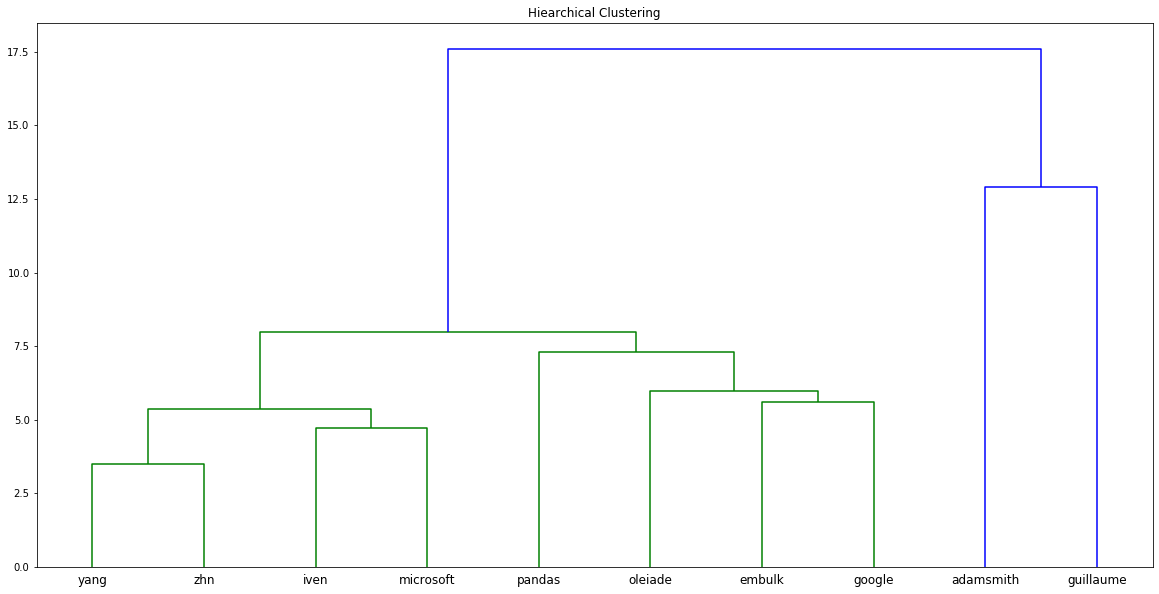

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linked = linkage(df.as_matrix(), 'single')
labelList = df.index

plt.figure(figsize=(20, 10))
plt.title('Hiearchical Clustering')
dend = dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
#plt.show()

### F-cluster return the labels for the each repo

In [8]:
# Print repo and their cluster number: Tweak the number to get different clustering option
for i in zip(df.index, fcluster(linked, 0.7)):
    print(i)

('adamsmith', 6)
('embulk', 3)
('google', 3)
('guillaume', 6)
('iven', 2)
('microsoft', 2)
('oleiade', 4)
('pandas', 5)
('yang', 1)
('zhn', 1)


# Agglomerative Clustering

C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


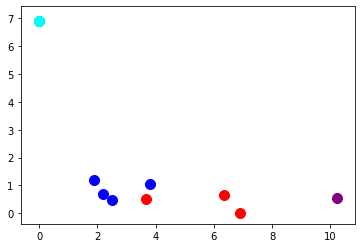

In [9]:
from sklearn.cluster import AgglomerativeClustering 

hc = AgglomerativeClustering(n_clusters = 5, linkage='single')

X = df.as_matrix()

y = hc.fit_predict(X)

plt.scatter(X[y==0, 0], X[y==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y==1, 0], X[y==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y==2, 0], X[y==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y==3, 0], X[y==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y==4, 0], X[y==4, 1], s=100, c='purple', label ='Cluster 5')

In [10]:
y

array([2, 0, 0, 3, 1, 1, 0, 4, 1, 1], dtype=int64)

In [11]:
df.index

Index(['adamsmith', 'embulk', 'google', 'guillaume', 'iven', 'microsoft',
       'oleiade', 'pandas', 'yang', 'zhn'],
      dtype='object')